In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load the dataset
df = pd.read_csv('HealthDataset.csv')

# Display the first few rows of the dataset
print(df.head())

# Display summary statistics
print(df.describe())

# Display information about the dataset
print(df.info())


   EmployeeID  Age Attrition     BusinessTravel  DailyRate  Department  \
0     1313919   41        No      Travel_Rarely       1102  Cardiology   
1     1200302   49        No  Travel_Frequently        279   Maternity   
2     1060315   37       Yes      Travel_Rarely       1373   Maternity   
3     1272912   33        No  Travel_Frequently       1392   Maternity   
4     1414939   27        No      Travel_Rarely        591   Maternity   

   DistanceFromHome  Education EducationField  EmployeeCount  ...  \
0                 1          2  Life Sciences              1  ...   
1                 8          1  Life Sciences              1  ...   
2                 2          2          Other              1  ...   
3                 3          4  Life Sciences              1  ...   
4                 2          1        Medical              1  ...   

   RelationshipSatisfaction StandardHours  Shift  TotalWorkingYears  \
0                         1          80.0    0.0                  8  

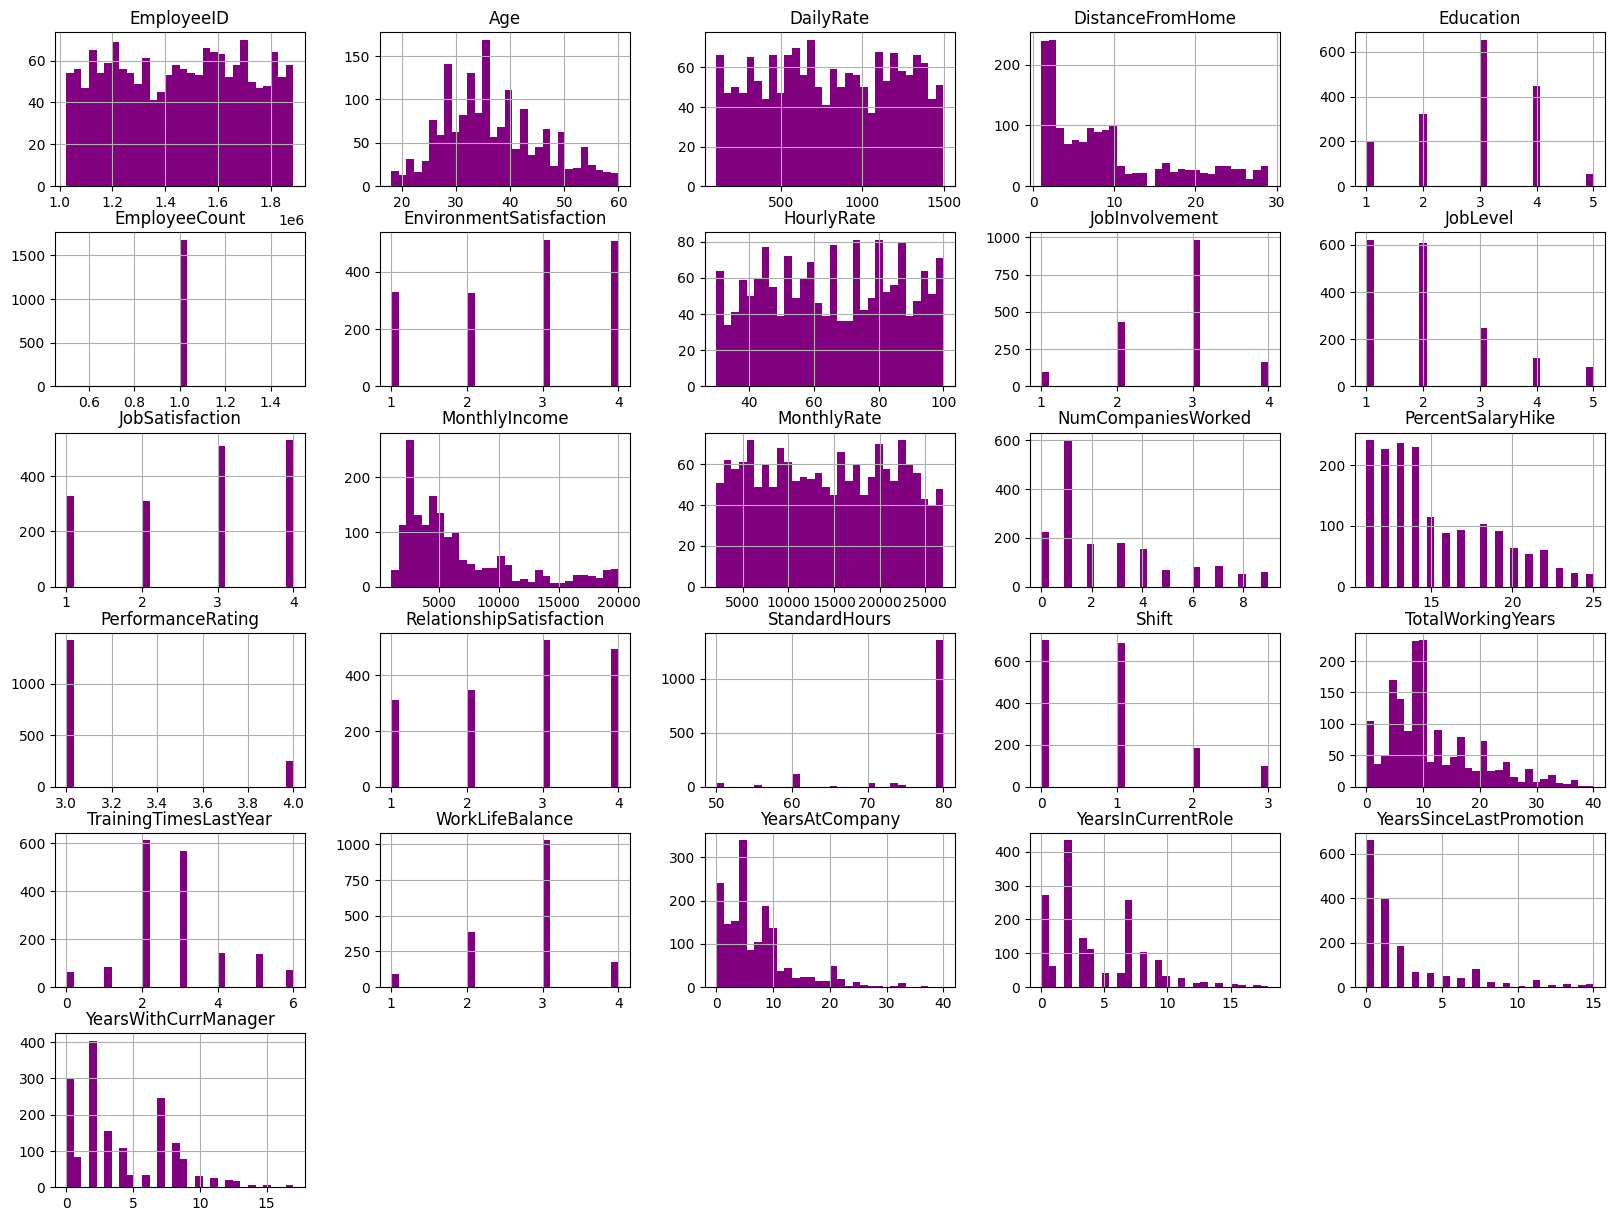

In [4]:
# Plotting histograms for numerical variables
df.hist(bins=30, figsize=(20, 15),color="purple")
plt.show()


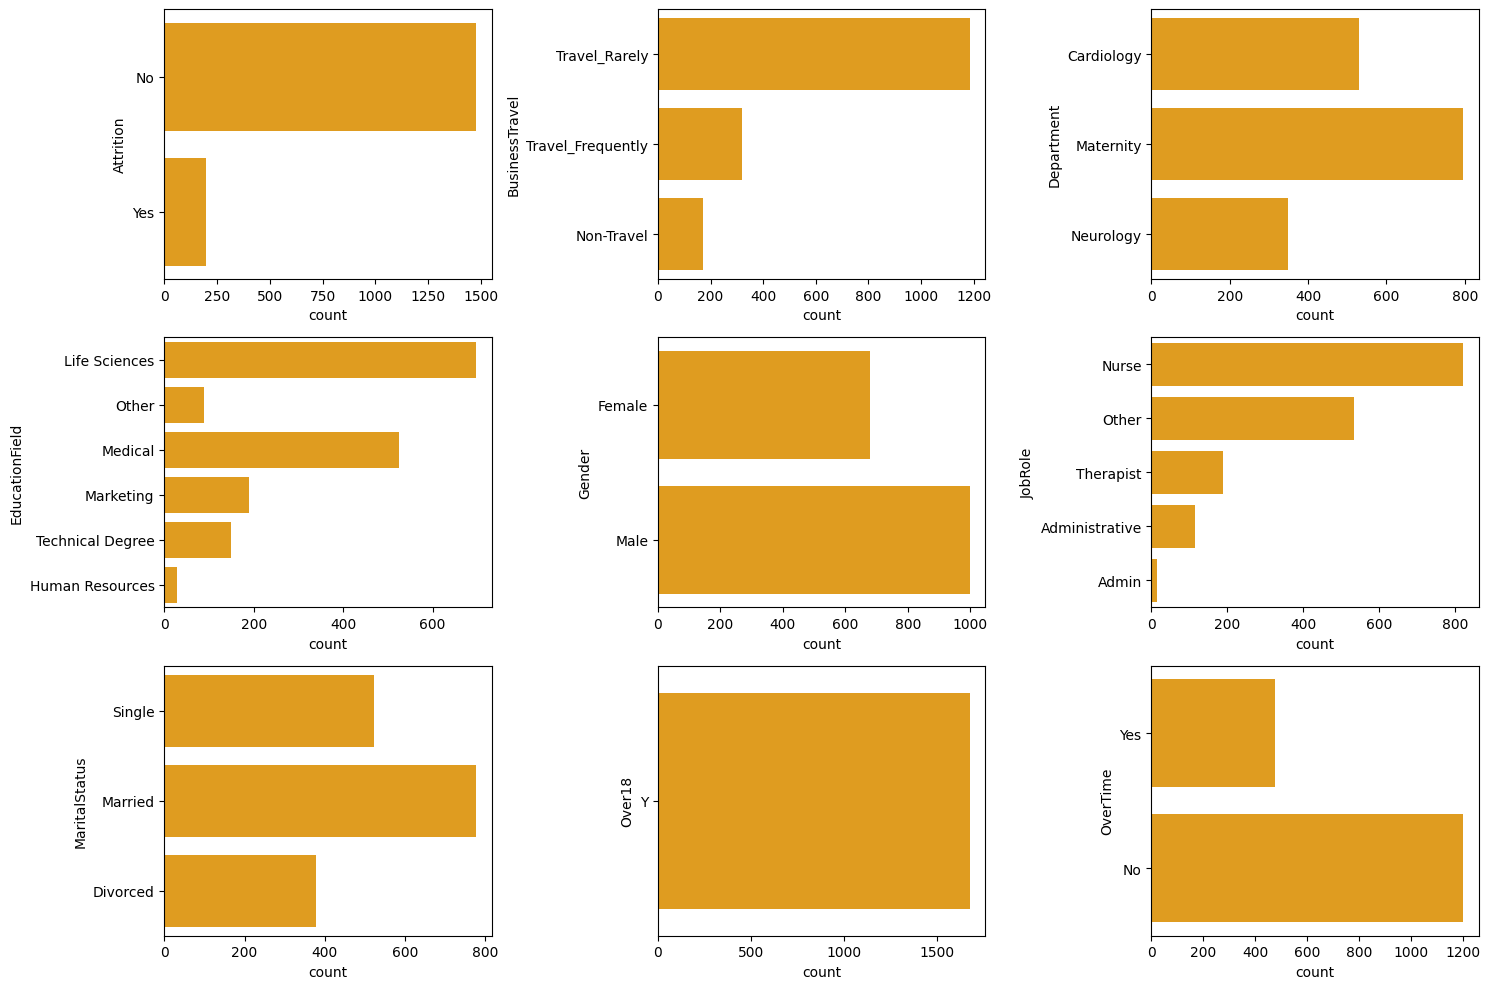

In [5]:
# Count plots for categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(y=col, data=df,color="orange")
plt.tight_layout()
plt.show()

Data Preprocessing

In [6]:
# 1. Handling Missing Values
# Check for missing values
print(df.isnull().sum())

EmployeeID                   0
Age                          0
Attrition                    0
BusinessTravel               0
DailyRate                    0
Department                   0
DistanceFromHome             0
Education                    0
EducationField               0
EmployeeCount                0
EnvironmentSatisfaction      0
Gender                       0
HourlyRate                   0
JobInvolvement               0
JobLevel                     0
JobRole                      0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
MonthlyRate                  0
NumCompaniesWorked           0
Over18                       0
OverTime                     0
PercentSalaryHike            0
PerformanceRating            0
RelationshipSatisfaction     0
StandardHours               34
Shift                        9
TotalWorkingYears            0
TrainingTimesLastYear        0
WorkLifeBalance              0
YearsAtCompany               0
YearsInC

In [7]:
#2.filling NA values
df['StandardHours'].fillna(df['StandardHours'].mean(), inplace=True)
df['Shift'].fillna(df['Shift'].mode()[0], inplace=True)

In [ ]:
print(df.isnull().sum())

EmployeeID                  0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
Shift                       0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
#3. Encode categorical variables
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
categorical_columns = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime', 'Shift']

for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le


In [ ]:
#4.feature scaling
from sklearn.preprocessing import StandardScaler

# Identify numerical columns
numerical_columns = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


In [ ]:
# 5. Normalizing Numerical Features
# Normalize numerical features using min-max scaling
df = pd.read_csv('HealthDataset.csv')
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

df[numerical_columns] = (df[numerical_columns] - df[numerical_columns].min()) / (df[numerical_columns].max() - df[numerical_columns].min())
df.head(10)

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.335278,0.547619,No,Travel_Rarely,0.715820,Cardiology,0.000000,0.25,Life Sciences,NaN,...,0.000000,1.000000,0.000000,0.200,0.000000,0.000000,0.150,0.222222,0.000000,0.294118
1,0.203350,0.738095,No,Travel_Frequently,0.126700,Maternity,0.250000,0.00,Life Sciences,NaN,...,1.000000,1.000000,0.333333,0.250,0.500000,0.666667,0.250,0.388889,0.066667,0.411765
2,0.040801,0.452381,Yes,Travel_Rarely,0.909807,Maternity,0.035714,0.25,Other,NaN,...,0.333333,0.133333,0.000000,0.175,0.500000,0.666667,0.000,0.000000,0.000000,0.000000
3,0.287662,0.357143,No,Travel_Frequently,0.923407,Maternity,0.071429,0.75,Life Sciences,NaN,...,0.666667,0.200000,0.000000,0.200,0.500000,0.666667,0.200,0.388889,0.200000,0.000000
4,0.452580,0.214286,No,Travel_Rarely,0.350036,Maternity,0.035714,0.00,Medical,NaN,...,1.000000,1.000000,0.333333,0.150,0.500000,0.666667,0.050,0.111111,0.133333,0.117647
5,0.706204,0.333333,No,Travel_Frequently,0.646385,Maternity,0.035714,0.25,Life Sciences,NaN,...,0.666667,1.000000,0.000000,0.200,0.333333,0.333333,0.175,0.388889,0.200000,0.352941
6,0.353243,0.976190,No,Travel_Rarely,0.874732,Maternity,0.071429,0.50,Medical,NaN,...,0.000000,1.000000,1.000000,0.300,0.500000,0.333333,0.025,0.000000,0.000000,0.000000
7,0.782757,0.285714,No,Travel_Rarely,0.899069,Maternity,0.821429,0.00,Life Sciences,NaN,...,0.333333,1.000000,0.333333,0.025,0.333333,0.666667,0.025,0.000000,0.000000,0.000000
8,0.516213,0.476190,No,Travel_Frequently,0.081603,Maternity,0.785714,0.50,Life Sciences,NaN,...,0.333333,1.000000,0.000000,0.250,0.333333,0.666667,0.225,0.388889,0.066667,0.470588
9,0.088381,0.428571,No,Travel_Rarely,0.856836,Maternity,0.928571,0.50,Medical,NaN,...,0.333333,0.133333,0.666667,0.425,0.500000,0.333333,0.175,0.388889,0.466667,0.411765


In [ ]:
#6. Perform z-score scaling on numerical features
df = pd.read_csv('HealthDataset.csv')
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

df[numerical_columns] = (df[numerical_columns] - df[numerical_columns].mean()) / df[numerical_columns].std()
df.head(10)

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,-0.574382,0.452798,No,Travel_Rarely,0.750613,Cardiology,-1.007825,-0.884663,Life Sciences,NaN,...,-1.593803,0.412110,-0.947021,-0.426152,-2.177447,-2.514504,-0.169440,-0.073031,-0.681349,0.242877
1,-1.031136,1.329114,No,Travel_Frequently,-1.298718,Maternity,-0.149784,-1.859478,Life Sciences,NaN,...,1.188711,0.412110,0.221509,-0.170887,0.150967,0.333002,0.486406,0.753995,-0.371712,0.804728
2,-1.593901,0.014640,Yes,Travel_Rarely,1.425423,Maternity,-0.885248,-0.884663,Other,NaN,...,-0.666298,-3.140755,-0.947021,-0.553785,0.150967,0.333002,-1.153209,-1.175732,-0.681349,-1.161751
3,-0.739235,-0.423518,No,Travel_Frequently,1.472735,Maternity,-0.762671,1.064969,Life Sciences,NaN,...,0.261207,-2.867458,-0.947021,-0.426152,0.150967,0.333002,0.158483,0.753995,0.247562,-1.161751
4,-0.168269,-1.080755,No,Travel_Rarely,-0.521815,Maternity,-0.885248,-1.859478,Medical,NaN,...,1.188711,0.412110,0.221509,-0.681417,0.150967,0.333002,-0.825286,-0.624382,-0.062075,-0.599900
5,0.709814,-0.533057,No,Travel_Frequently,0.509076,Maternity,-0.885248,-0.884663,Life Sciences,NaN,...,0.261207,0.412110,-0.947021,-0.426152,-0.625171,-1.090751,-0.005478,0.753995,0.247562,0.523802
6,-0.512187,2.424510,No,Travel_Rarely,1.303410,Maternity,-0.762671,0.090153,Medical,NaN,...,-1.593803,0.412110,2.558570,0.084378,0.150967,-1.090751,-0.989248,-1.175732,-0.681349,-1.161751
7,0.974849,-0.752136,No,Travel_Rarely,1.388072,Maternity,1.811453,-1.859478,Life Sciences,NaN,...,-0.666298,0.412110,0.221509,-1.319580,-0.625171,0.333002,-0.989248,-1.175732,-0.681349,-1.161751
8,0.052038,0.124180,No,Travel_Frequently,-1.455593,Maternity,1.688875,0.090153,Life Sciences,NaN,...,-0.666298,0.412110,-0.947021,-0.170887,-0.625171,0.333002,0.322445,0.753995,-0.371712,1.085653
9,-1.429173,-0.094899,No,Travel_Rarely,1.241158,Maternity,2.179184,0.090153,Medical,NaN,...,-0.666298,-3.140755,1.390040,0.722540,0.150967,-1.090751,-0.005478,0.753995,1.486110,0.804728


In [ ]:
#7. Perform decimal scaling
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

for column in numerical_columns:
    max_abs_value = df[column].abs().max()
    scaling_factor = 10 ** np.ceil(np.log10(max_abs_value))
    df[column] = df[column] / scaling_factor
df.head(10)

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,-0.057438,0.045280,No,Travel_Rarely,0.075061,Cardiology,-0.100783,-0.088466,Life Sciences,NaN,...,-0.159380,0.041211,-0.094702,-0.042615,-0.217745,-0.251450,-0.016944,-0.007303,-0.068135,0.024288
1,-0.103114,0.132911,No,Travel_Frequently,-0.129872,Maternity,-0.014978,-0.185948,Life Sciences,NaN,...,0.118871,0.041211,0.022151,-0.017089,0.015097,0.033300,0.048641,0.075400,-0.037171,0.080473
2,-0.159390,0.001464,Yes,Travel_Rarely,0.142542,Maternity,-0.088525,-0.088466,Other,NaN,...,-0.066630,-0.314076,-0.094702,-0.055378,0.015097,0.033300,-0.115321,-0.117573,-0.068135,-0.116175
3,-0.073924,-0.042352,No,Travel_Frequently,0.147273,Maternity,-0.076267,0.106497,Life Sciences,NaN,...,0.026121,-0.286746,-0.094702,-0.042615,0.015097,0.033300,0.015848,0.075400,0.024756,-0.116175
4,-0.016827,-0.108076,No,Travel_Rarely,-0.052181,Maternity,-0.088525,-0.185948,Medical,NaN,...,0.118871,0.041211,0.022151,-0.068142,0.015097,0.033300,-0.082529,-0.062438,-0.006208,-0.059990
5,0.070981,-0.053306,No,Travel_Frequently,0.050908,Maternity,-0.088525,-0.088466,Life Sciences,NaN,...,0.026121,0.041211,-0.094702,-0.042615,-0.062517,-0.109075,-0.000548,0.075400,0.024756,0.052380
6,-0.051219,0.242451,No,Travel_Rarely,0.130341,Maternity,-0.076267,0.009015,Medical,NaN,...,-0.159380,0.041211,0.255857,0.008438,0.015097,-0.109075,-0.098925,-0.117573,-0.068135,-0.116175
7,0.097485,-0.075214,No,Travel_Rarely,0.138807,Maternity,0.181145,-0.185948,Life Sciences,NaN,...,-0.066630,0.041211,0.022151,-0.131958,-0.062517,0.033300,-0.098925,-0.117573,-0.068135,-0.116175
8,0.005204,0.012418,No,Travel_Frequently,-0.145559,Maternity,0.168888,0.009015,Life Sciences,NaN,...,-0.066630,0.041211,-0.094702,-0.017089,-0.062517,0.033300,0.032244,0.075400,-0.037171,0.108565
9,-0.142917,-0.009490,No,Travel_Rarely,0.124116,Maternity,0.217918,0.009015,Medical,NaN,...,-0.066630,-0.314076,0.139004,0.072254,0.015097,-0.109075,-0.000548,0.075400,0.148611,0.080473


In [ ]:
#8 checking for outliers
for column in numerical_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    if not outliers.empty:
        print(f"Outliers in {column}:")
        print(outliers[[column]])
    else:
        print("no outlier")

    # Cap outliers
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

no outlier
no outlier
no outlier
no outlier
no outlier
no outlier
no outlier
no outlier
no outlier
no outlier
no outlier
Outliers in MonthlyIncome:
      MonthlyIncome
25         0.265996
29         0.262887
45         0.275534
62         0.258509
105        0.260708
...             ...
1550       0.216550
1559       0.275364
1567       0.257896
1577       0.267962
1610       0.256923

[132 rows x 1 columns]
no outlier
Outliers in NumCompaniesWorked:
      NumCompaniesWorked
4                0.25579
38               0.25579
50               0.25579
95               0.25579
105              0.25579
122              0.25579
194              0.25579
198              0.25579
208              0.25579
245              0.25579
287              0.25579
290              0.25579
334              0.25579
371              0.25579
372              0.25579
385              0.25579
393              0.25579
401              0.25579
439              0.25579
446              0.25579
455              0.2

In [ ]:
# 9.Capping outliers in 'DailyRate' at the 99th percentile
cap = df['DailyRate'].quantile(0.99)
df['DailyRate'] = df['DailyRate'].apply(lambda x: min(x, cap))


In [ ]:
#10 Convert binary columns to numerical values
binary_columns = ['Attrition', 'Over18', 'OverTime']
for column in binary_columns:
    df[column] = df[column].map({'Yes': 1, 'No': 0, 'Y': 1, 'N': 0})

# Display the first few rows of the updated dataset
print("Dataset after mapping binary columns:")
print(df.head())

Dataset after mapping binary columns:
   EmployeeID       Age  Attrition     BusinessTravel  DailyRate  Department  \
0   -0.057438  0.452933          0      Travel_Rarely   0.750837  Cardiology   
1   -0.103114  1.329511          0  Travel_Frequently  -1.299105   Maternity   
2   -0.159390  0.014644          1      Travel_Rarely   1.425849   Maternity   
3   -0.073924 -0.423644          0  Travel_Frequently   1.473174   Maternity   
4   -0.016827 -1.081078          0      Travel_Rarely  -0.521970   Maternity   

   DistanceFromHome  Education EducationField  EmployeeCount  ...  \
0         -1.008126  -0.884927  Life Sciences            NaN  ...   
1         -0.149829  -1.860033  Life Sciences            NaN  ...   
2         -0.885512  -0.884927          Other            NaN  ...   
3         -0.762898   1.065286  Life Sciences            NaN  ...   
4         -0.885512  -1.860033        Medical            NaN  ...   

   RelationshipSatisfaction StandardHours     Shift  TotalWorkingY

In [ ]:
#11. removing duplicates
df.drop_duplicates(inplace=True)


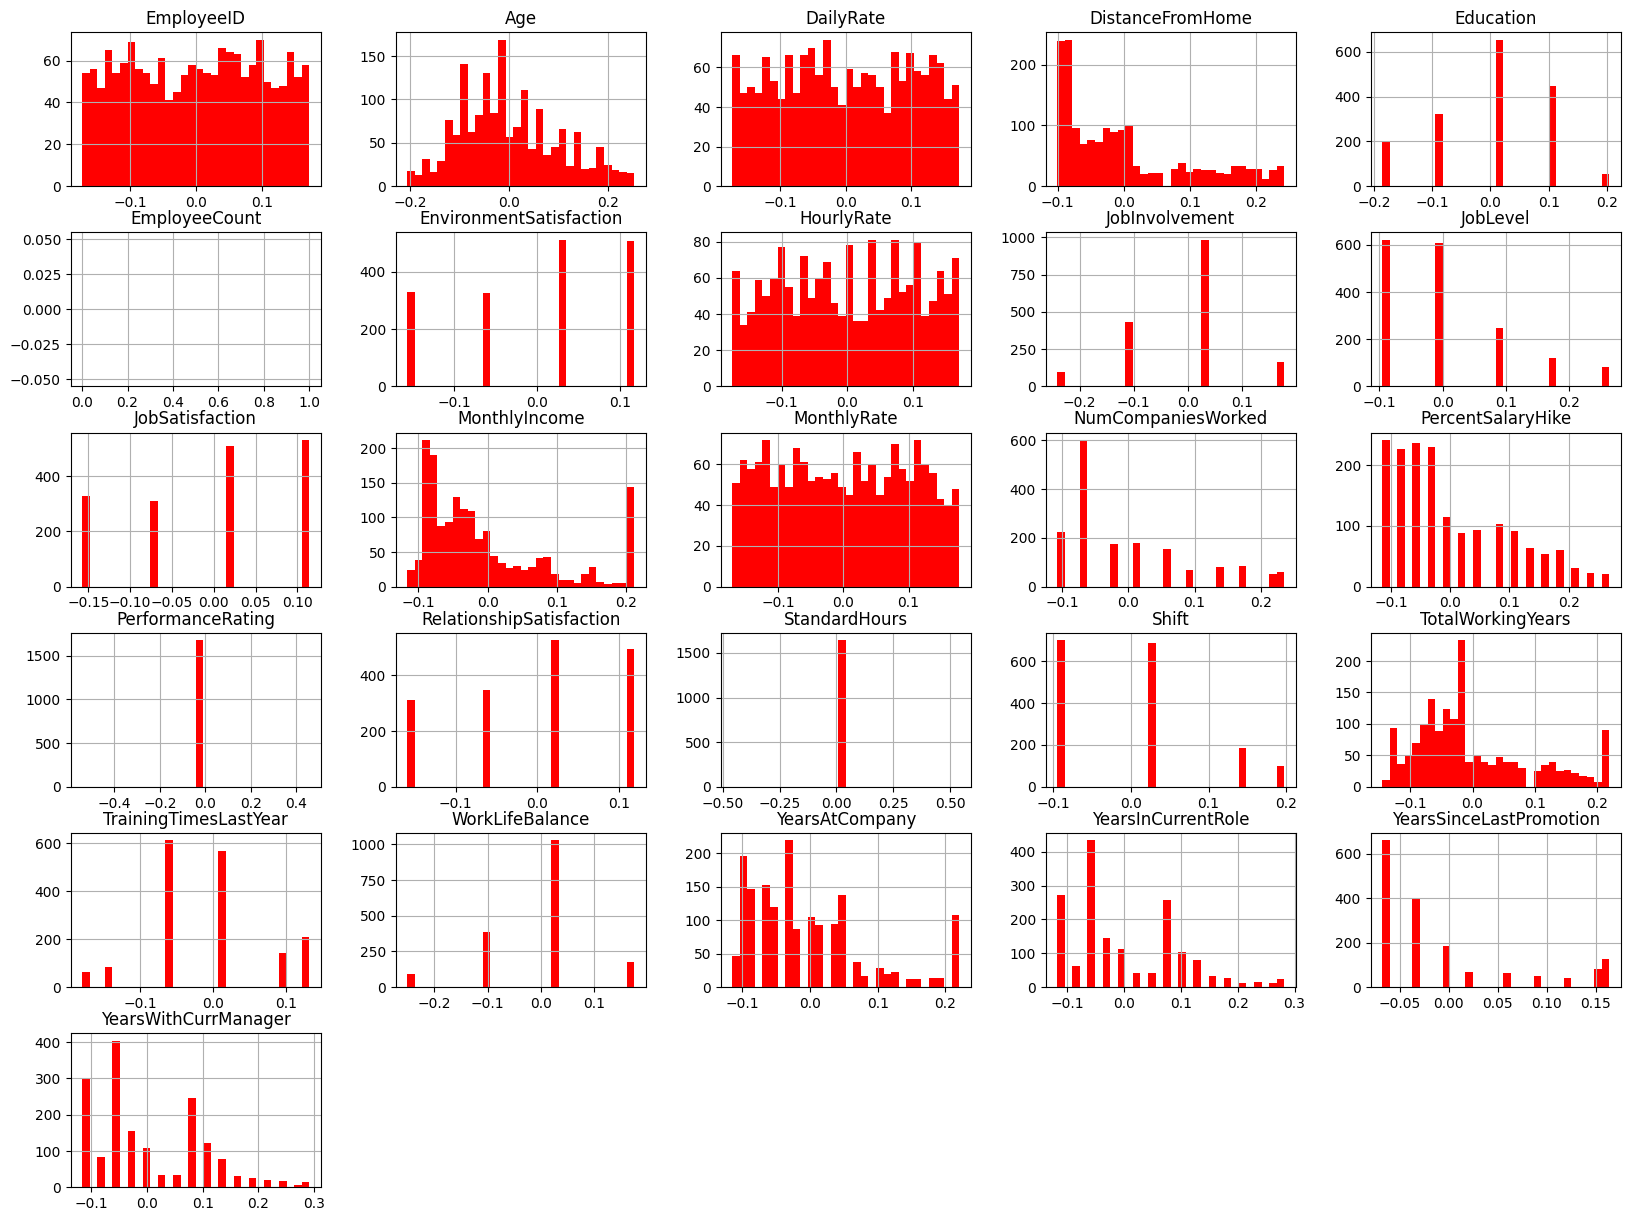

In [ ]:
# Plotting histograms for numerical variables
df.hist(bins=30, figsize=(20, 15),color="red")
plt.show()


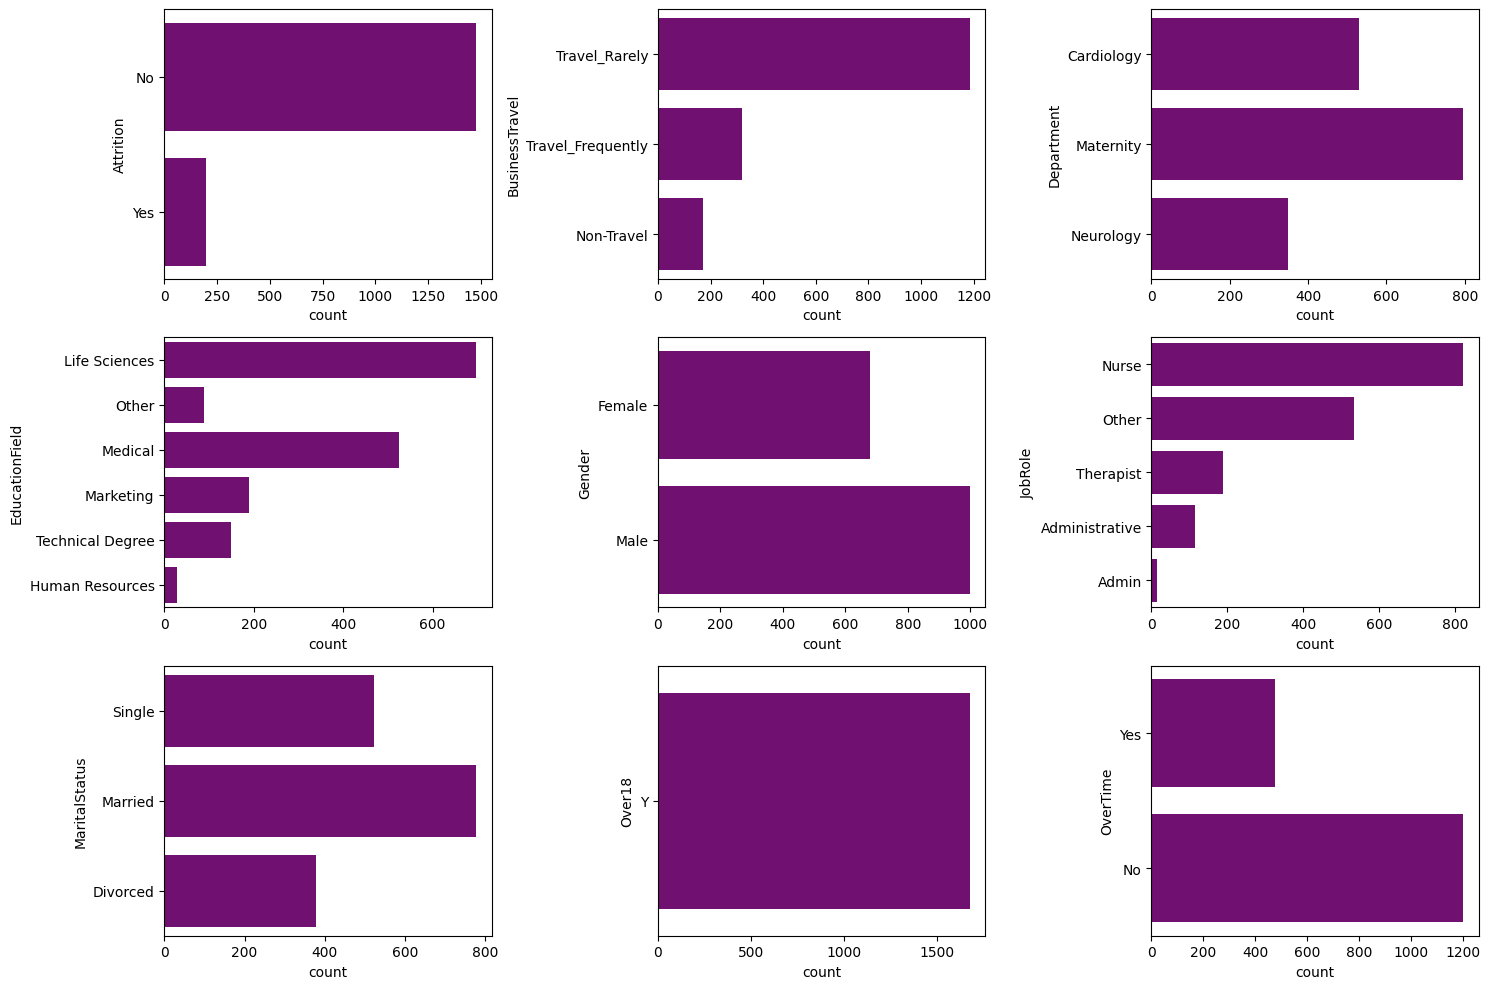

In [ ]:
# Count plots for categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(y=col, data=df,color="purple")
plt.tight_layout()
plt.show()

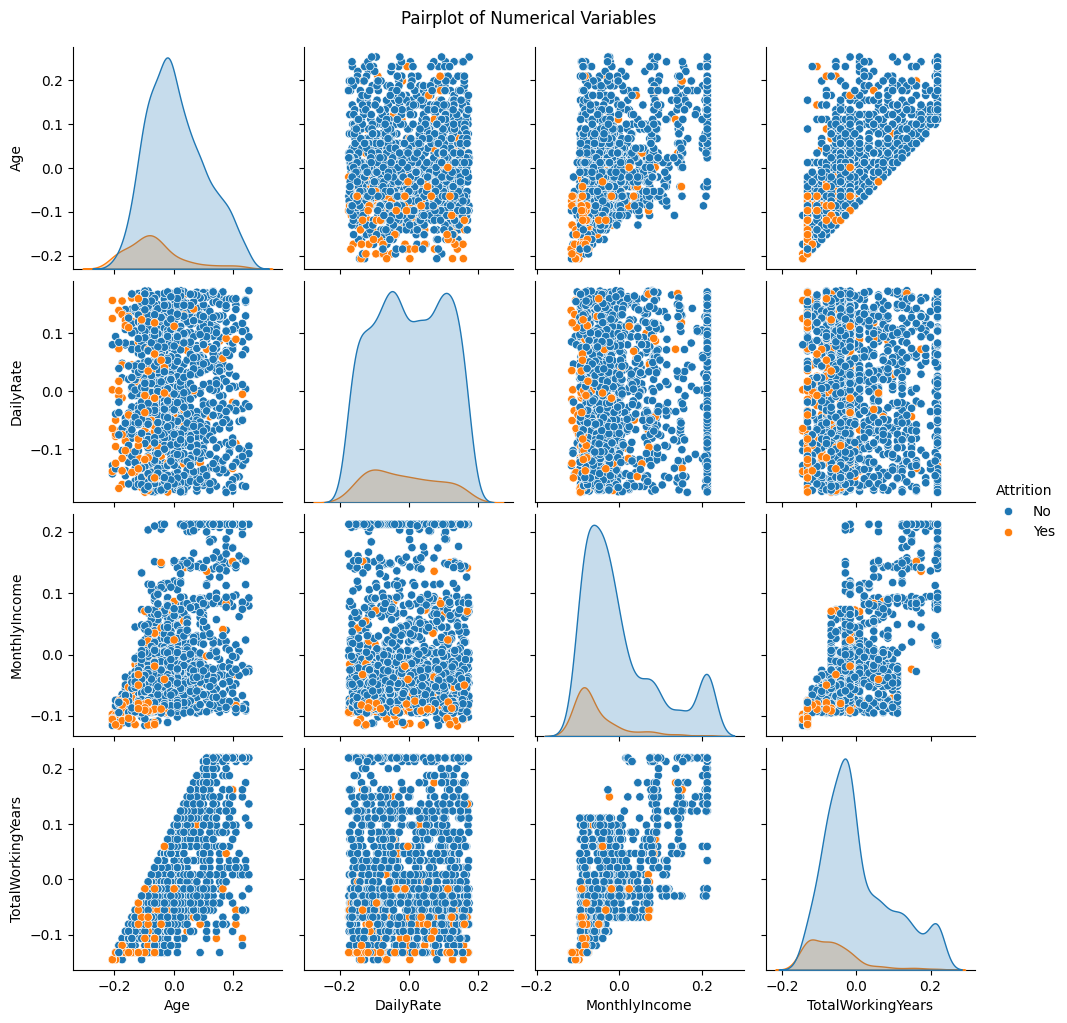

In [ ]:
# Pairplot for numerical variables
sns.pairplot(df, vars=['Age', 'DailyRate', 'MonthlyIncome', 'TotalWorkingYears'], hue='Attrition', diag_kind='kde')
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()


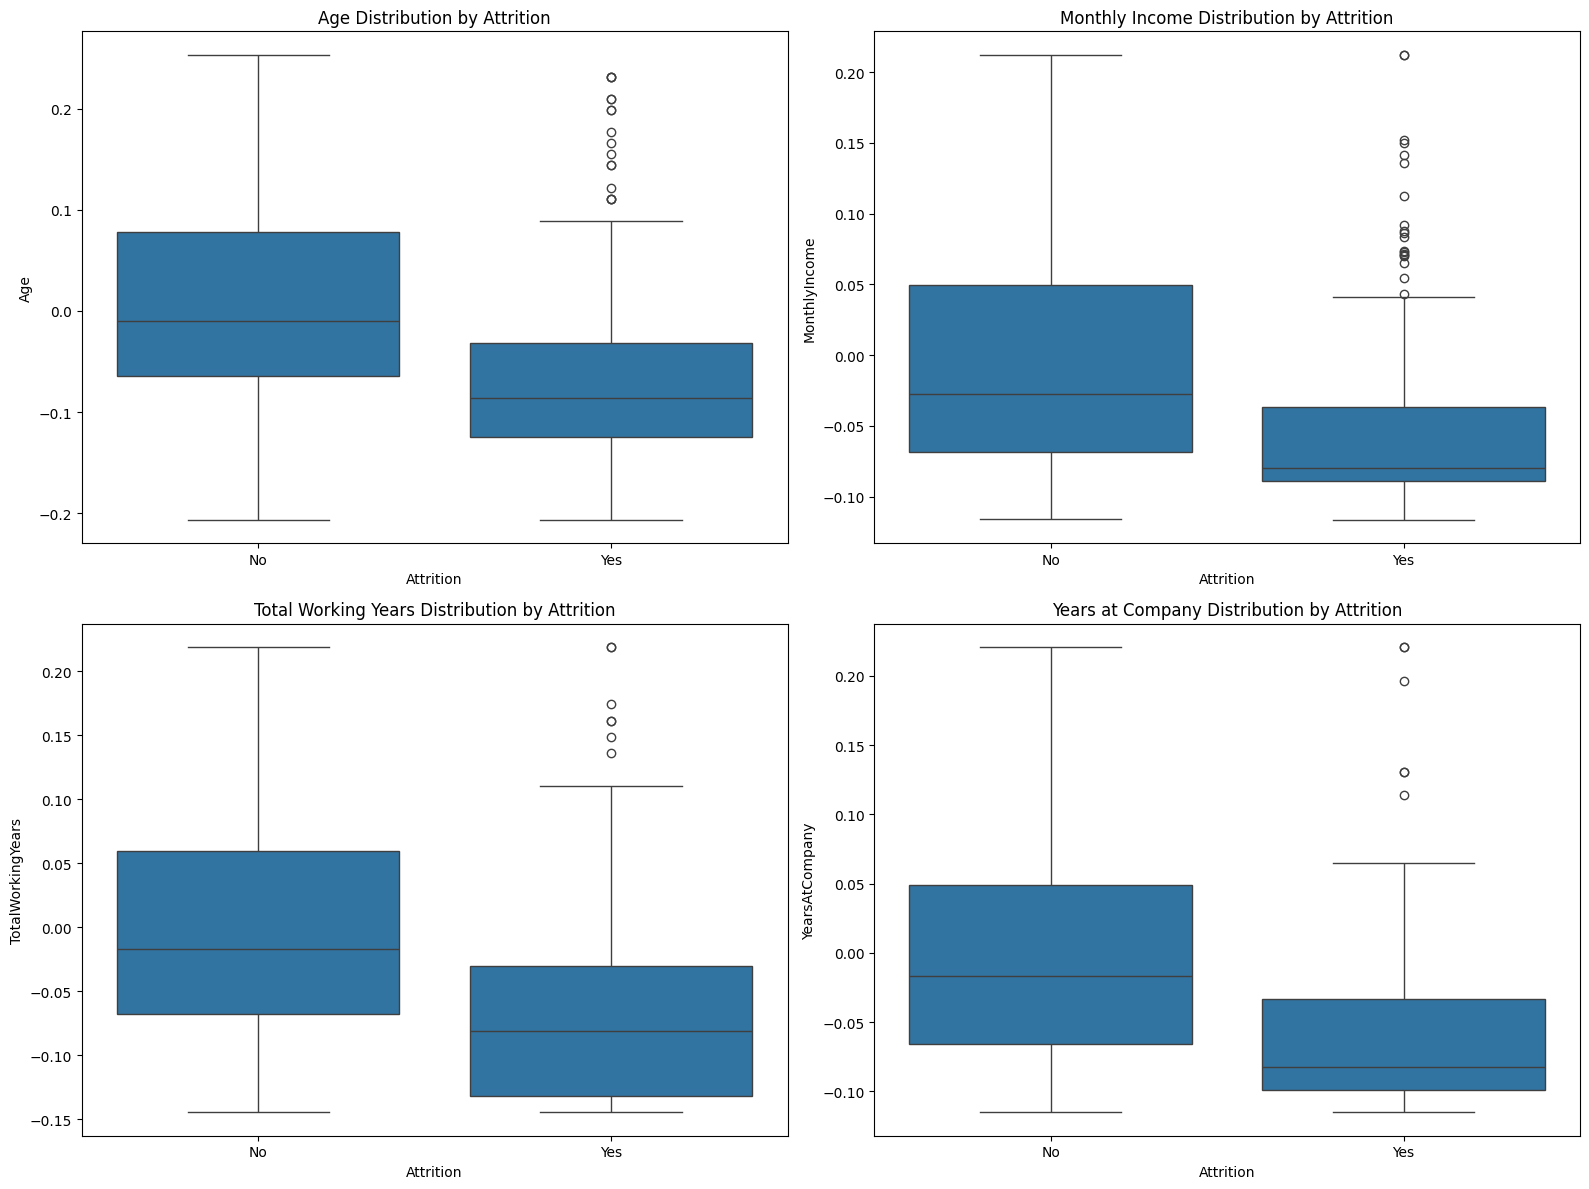

In [ ]:
# Set up the matplotlib figure
plt.figure(figsize=(16, 12))

# Boxplot of Age by Attrition
plt.subplot(2, 2, 1)
sns.boxplot(x='Attrition', y='Age', data=df)
plt.title('Age Distribution by Attrition')

# Boxplot of MonthlyIncome by Attrition
plt.subplot(2, 2, 2)
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title('Monthly Income Distribution by Attrition')

# Boxplot of TotalWorkingYears by Attrition
plt.subplot(2, 2, 3)
sns.boxplot(x='Attrition', y='TotalWorkingYears', data=df)
plt.title('Total Working Years Distribution by Attrition')

# Boxplot of YearsAtCompany by Attrition
plt.subplot(2, 2, 4)
sns.boxplot(x='Attrition', y='YearsAtCompany', data=df)
plt.title('Years at Company Distribution by Attrition')

plt.tight_layout()
plt.show()


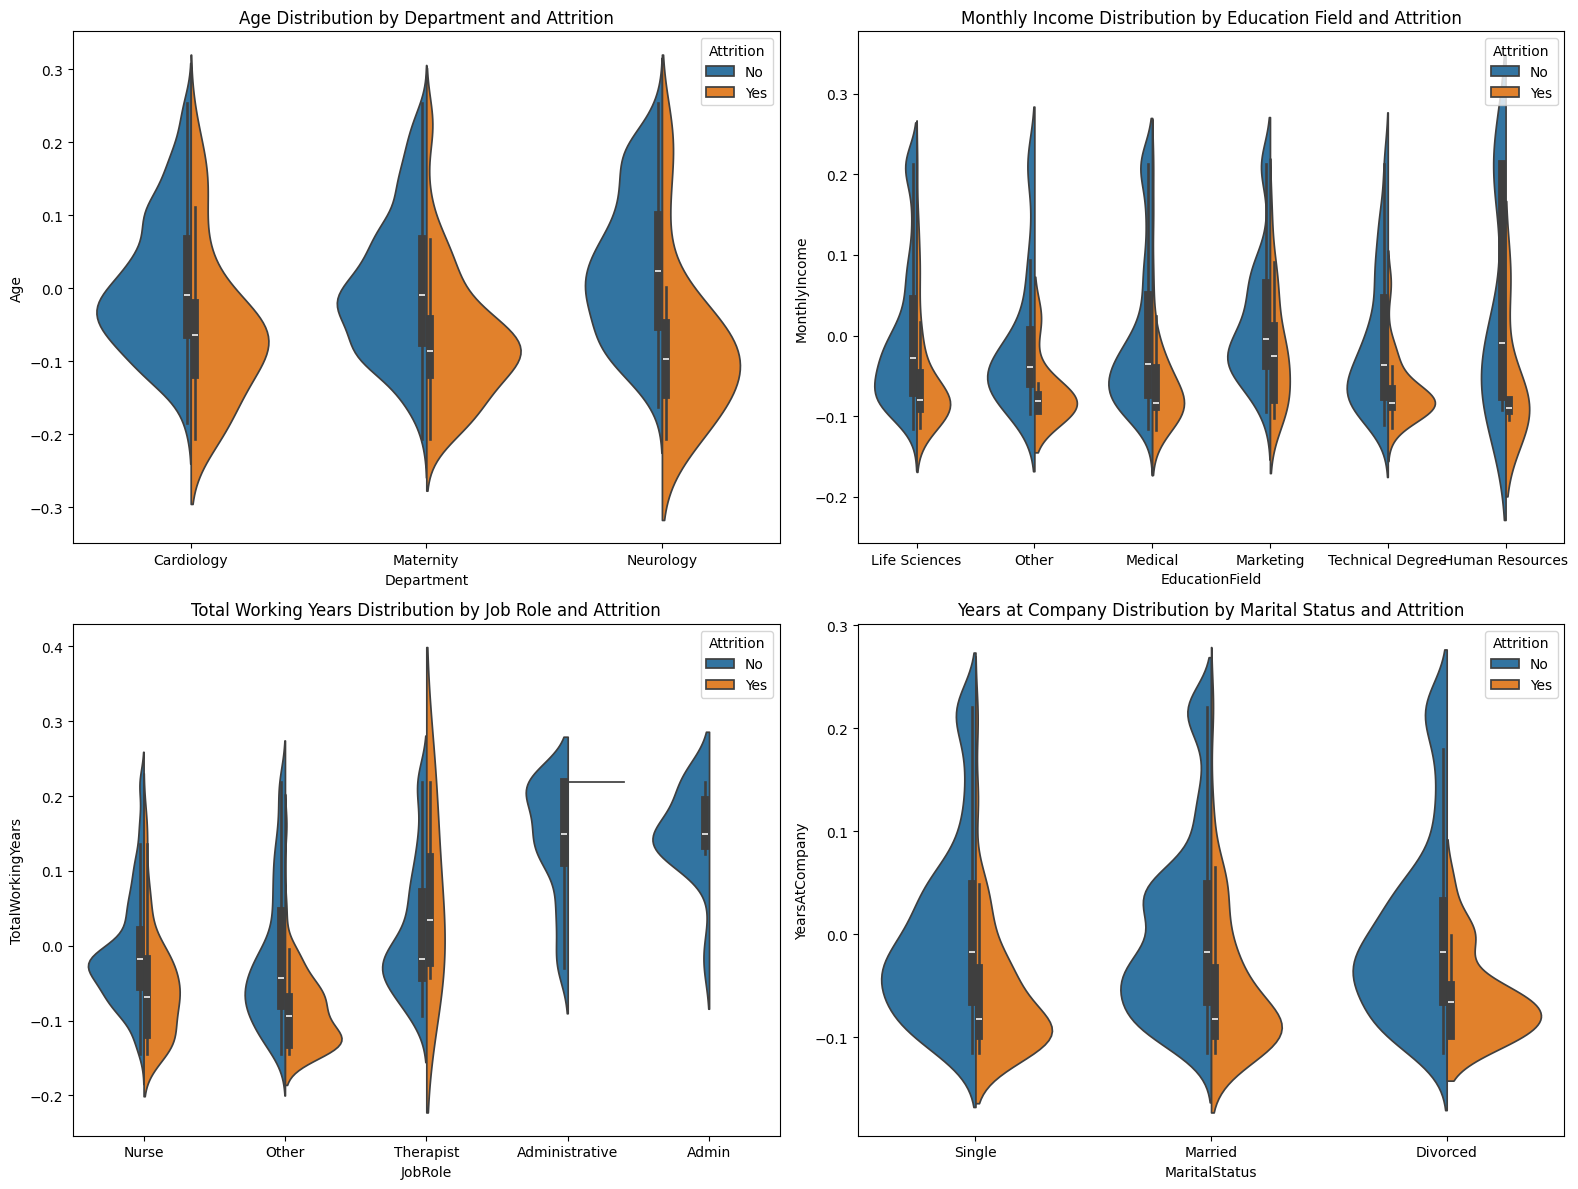

In [ ]:
# Set up the matplotlib figure
plt.figure(figsize=(16, 12))

# Violin plot of Age by Department and Attrition
plt.subplot(2, 2, 1)
sns.violinplot(x='Department', y='Age', hue='Attrition', data=df, split=True)
plt.title('Age Distribution by Department and Attrition')

# Violin plot of MonthlyIncome by EducationField and Attrition
plt.subplot(2, 2, 2)
sns.violinplot(x='EducationField', y='MonthlyIncome', hue='Attrition', data=df, split=True)
plt.title('Monthly Income Distribution by Education Field and Attrition')

# Violin plot of TotalWorkingYears by JobRole and Attrition
plt.subplot(2, 2, 3)
sns.violinplot(x='JobRole', y='TotalWorkingYears', hue='Attrition', data=df, split=True)
plt.title('Total Working Years Distribution by Job Role and Attrition')

# Violin plot of YearsAtCompany by MaritalStatus and Attrition
plt.subplot(2, 2, 4)
sns.violinplot(x='MaritalStatus', y='YearsAtCompany', hue='Attrition', data=df, split=True)
plt.title('Years at Company Distribution by Marital Status and Attrition')

plt.tight_layout()
plt.show()


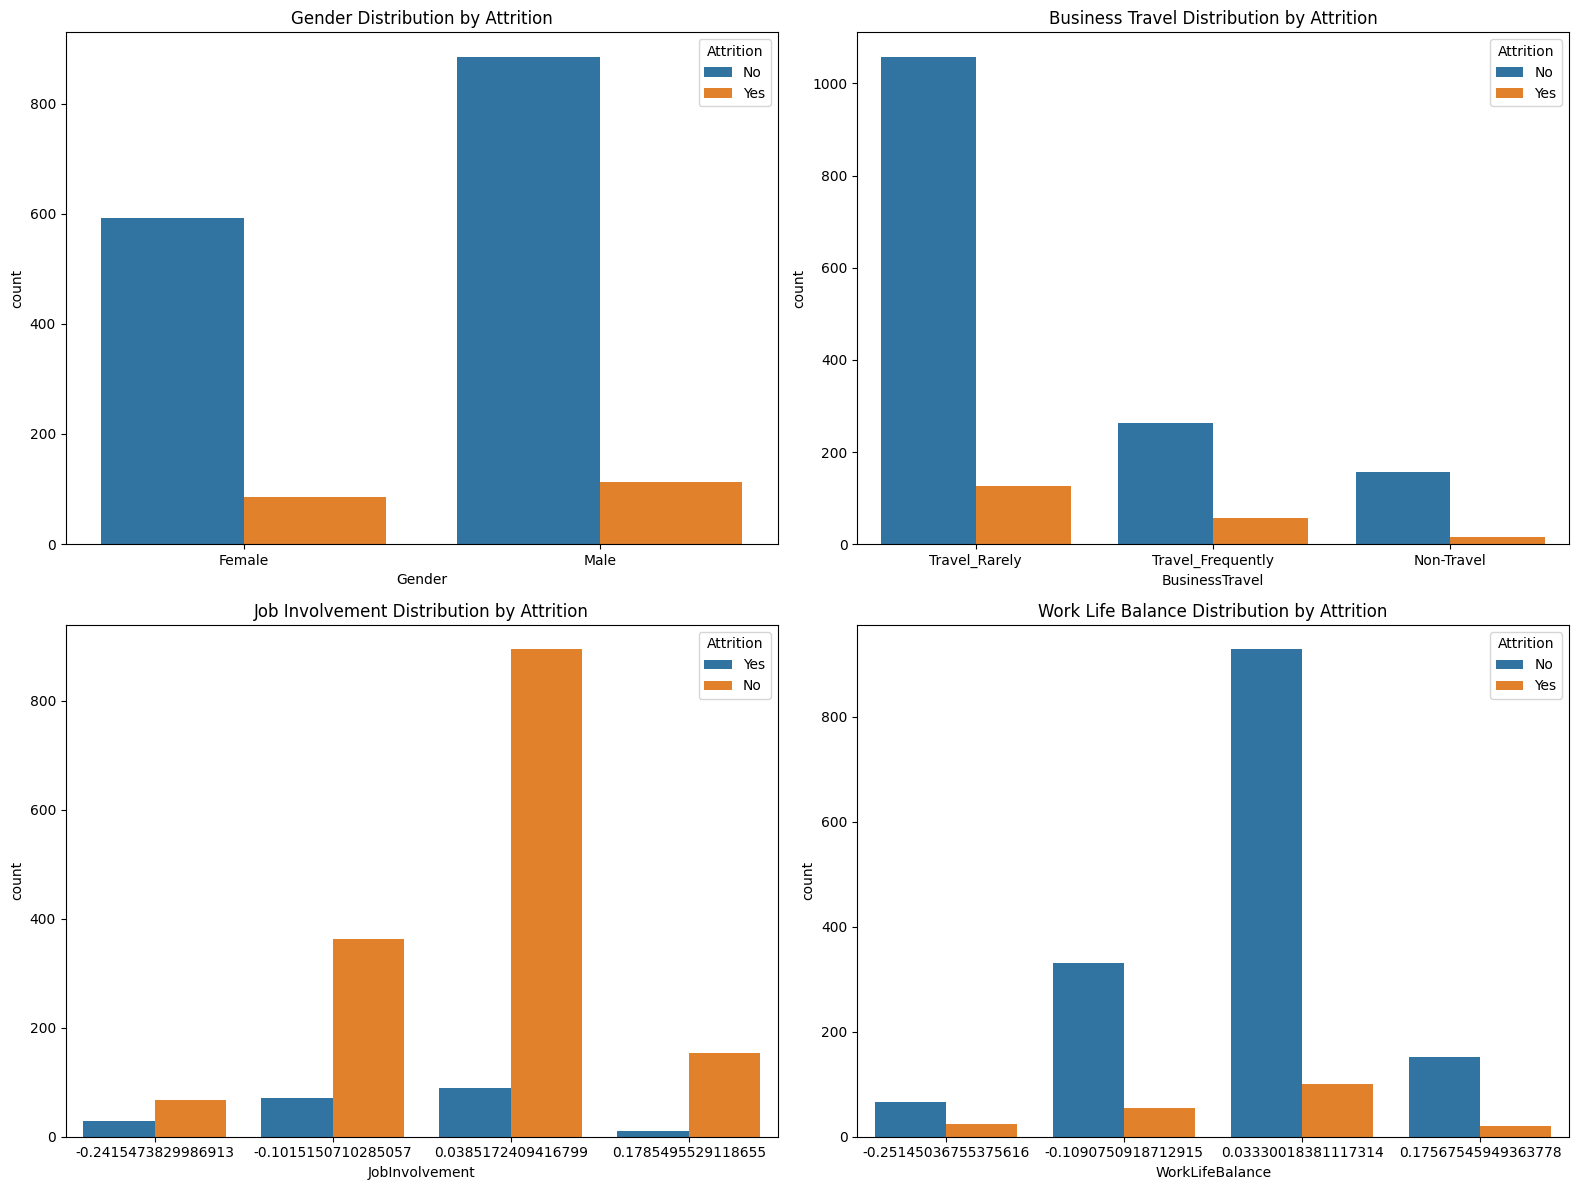

In [ ]:
# Set up the matplotlib figure
plt.figure(figsize=(16, 12))

# Countplot of Gender by Attrition
plt.subplot(2, 2, 1)
sns.countplot(x='Gender', hue='Attrition', data=df)
plt.title('Gender Distribution by Attrition')

# Countplot of BusinessTravel by Attrition
plt.subplot(2, 2, 2)
sns.countplot(x='BusinessTravel', hue='Attrition', data=df)
plt.title('Business Travel Distribution by Attrition')

# Countplot of JobInvolvement by Attrition
plt.subplot(2, 2, 3)
sns.countplot(x='JobInvolvement', hue='Attrition', data=df)
plt.title('Job Involvement Distribution by Attrition')

# Countplot of WorkLifeBalance by Attrition
plt.subplot(2, 2, 4)
sns.countplot(x='WorkLifeBalance', hue='Attrition', data=df)
plt.title('Work Life Balance Distribution by Attrition')

plt.tight_layout()
plt.show()


EmployeeID                  float64
Age                         float64
Attrition                     int64
BusinessTravel                int64
DailyRate                   float64
Department                    int64
DistanceFromHome            float64
Education                   float64
EducationField                int64
EmployeeCount               float64
EnvironmentSatisfaction     float64
Gender                        int64
HourlyRate                  float64
JobInvolvement              float64
JobLevel                    float64
JobRole                       int64
JobSatisfaction             float64
MaritalStatus                 int64
MonthlyIncome               float64
MonthlyRate                 float64
NumCompaniesWorked          float64
Over18                        int64
OverTime                      int64
PercentSalaryHike           float64
PerformanceRating           float64
RelationshipSatisfaction    float64
StandardHours               float64
Shift                       

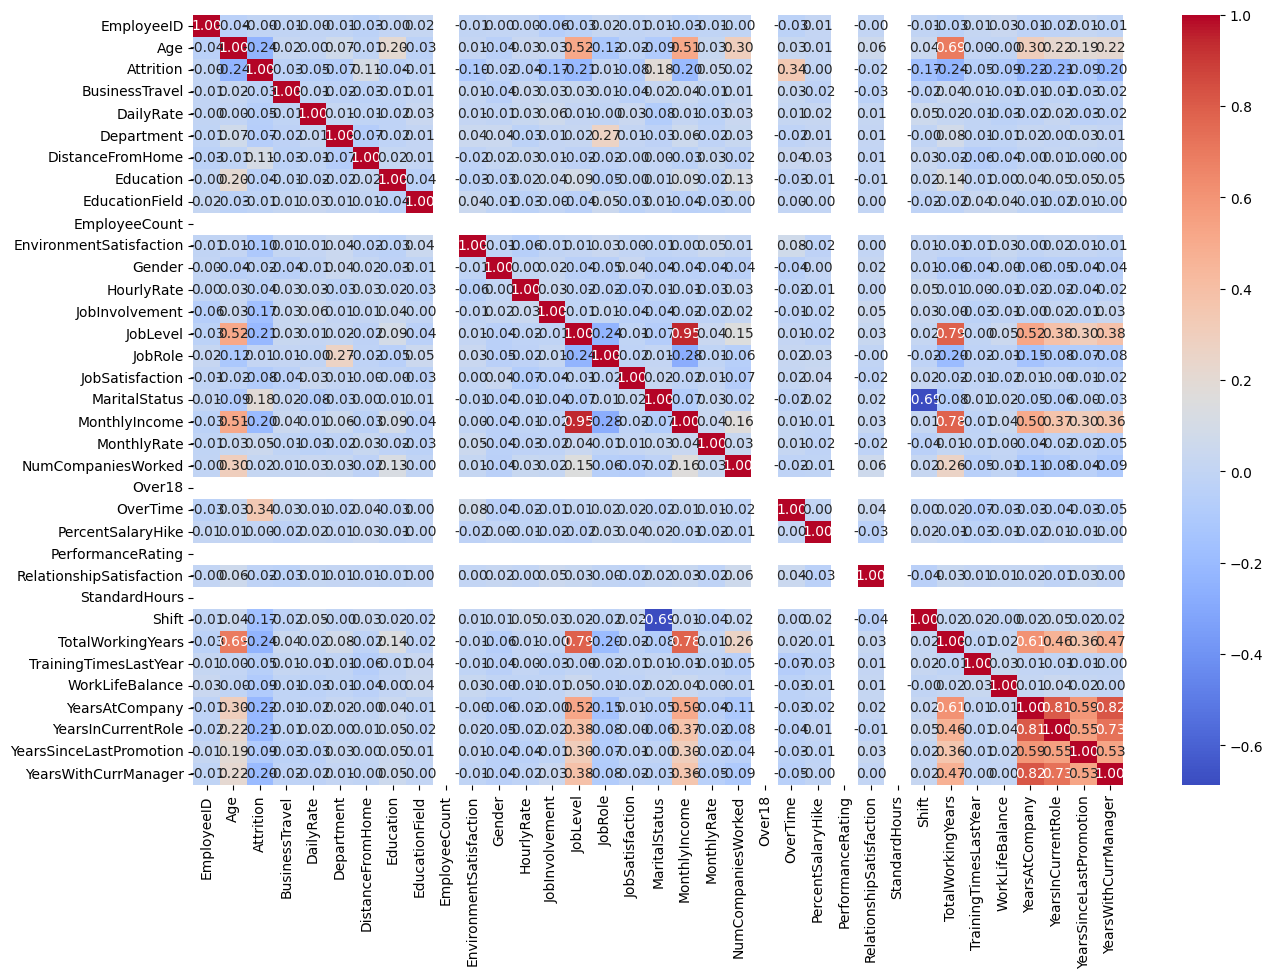

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns
# print(categorical_cols)
# Encode categorical columns using LabelEncoder
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Verify the data types to ensure all are numeric
print(df.dtypes)

# Compute the correlation matrix and plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()